# EFSA-MINI PROJECT FOR STATISTICAL LEARNING COURSE

This Notebook is created by Mert Cihangiroglu for the Mini Project for Statistical Learning course in University of Pavia

DOWNLOADING NECESSARY LIBRARIES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split

## IMPORT DATA 

In [21]:
data_excel = pd.read_excel("Mini Project EFSA.xlsx")
data=pd.DataFrame(data_excel)

In [3]:
data

,response,number of animals,SD,dose,"sex \n(0=M, 1=F)",endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


##  I will plot the dose response for each gender and endpoint

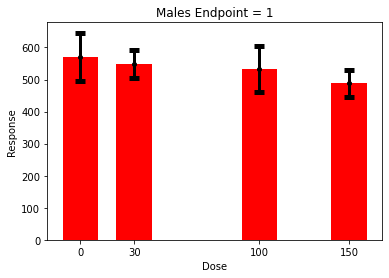

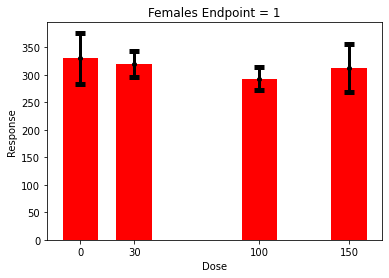

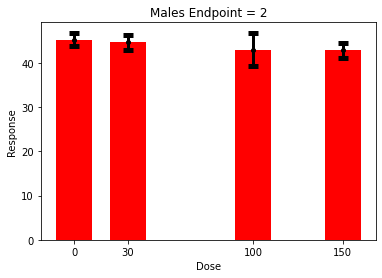

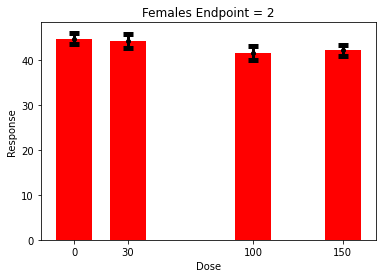

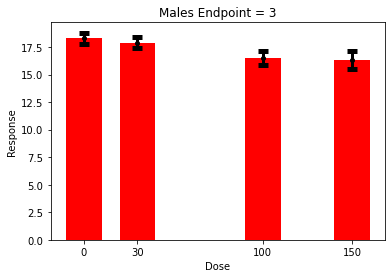

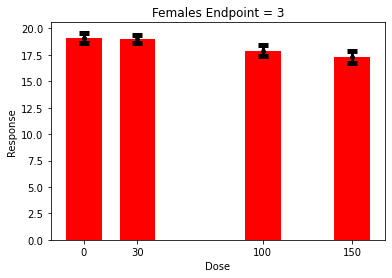

In [22]:
for y in range(int(len(data)/4)): # every 4 row our endpoint changes that is why I am dividing the lenght for 4 that is th
                                 #itaration number 
    if y ==0:
        i=0
    else:
        i+=4
        
    x1 = data.iloc[i:i+4]['dose']
    y1 = data.iloc[i:i+4]['response']
    yerr=data.iloc[i:i+4]['SD']
    endpoint=data.iloc[i:i+4]['endpoint']
    plot = plt.figure(i) 
    plt.errorbar(x1, y1 , yerr, fmt='o', color='Black', elinewidth=3,capthick=5,errorevery=1, alpha=1, ms=4, capsize = 5)
    plt.bar(x1, y1, width=20, align='center',color='red')
    plt.xticks(x1)
    t= endpoint[i]
    
    if y%2==0:
        plt.title('Males Endpoint = {}'.format(t))
        plt.savefig('Males Endpoint = {}.png'.format(t)) ## saving the plot as a png file
    else:
        plt.title('Females Endpoint = {}'.format(t))
        plt.savefig('Females Endpoint = {}.png'.format(t)) ## saving the plot as a png file
    plt.xlabel('Dose') ## Label on X axis
    plt.ylabel('Response') ##Label on Y axis
    
   

# Change the column name and set dummy variables

## I am creating dummy variables for gender and endpoint coefficients since these are categorical data at the end I will have variables named Male , Female and 1,2,3 for endpoints

In [23]:
data_excel = pd.read_excel("Mini Project EFSA.xlsx")
data=pd.DataFrame(data_excel)

data['endpoint'] = pd.Categorical(data.endpoint)
data = data.rename(columns={"sex \n(0=M, 1=F)": "Gender"})

data ['Gender'] = data['Gender'].astype('category')
data ['endpoint'] = data['endpoint'].astype('category')

dummies = pd.get_dummies(data.Gender)
data = data.drop(columns=['Gender']).merge(dummies,left_index=True,right_index=True)
data = data.rename(columns={0: "Male"})
data = data.rename(columns={1: "Female"})

dummies = pd.get_dummies(data.endpoint)
data = data.drop(columns=['endpoint']).merge(dummies,left_index=True,right_index=True)
print(data)
data.var() # let's see our variance

    response  number of animals    SD  dose  Male  Female  1  2  3
0      570.4                  9  75.6     0     1       0  1  0  0
1      548.5                 10  44.3    30     1       0  1  0  0
2      533.0                 10  72.3   100     1       0  1  0  0
3      488.1                  9  42.5   150     1       0  1  0  0
4      329.8                 10  46.8     0     0       1  1  0  0
5      319.7                 10  24.3    30     0       1  1  0  0
6      293.3                 10  20.1   100     0       1  1  0  0
7      312.4                 10  43.1   150     0       1  1  0  0
8       45.2                  9   1.5     0     1       0  0  1  0
9       44.6                 10   1.7    30     1       0  0  1  0
10      43.0                 10   3.8   100     1       0  0  1  0
11      42.8                  9   1.7   150     1       0  0  1  0
12      44.7                 10   1.3     0     0       1  0  1  0
13      44.1                 10   1.6    30     0       1  0  

response             40512.038678
number of animals        0.195652
SD                     587.859928
dose                  3600.000000
Male                     0.260870
Female                   0.260870
1                        0.231884
2                        0.231884
3                        0.231884
dtype: float64

## MODEL 1 (Using Backword Subset Selection for Endpoint 1)

In [24]:
# Backward Elimination

X_Train_model_1 = data.iloc[0:8][['Male','Female','dose']] 


Target_model_1=data.iloc[0:8][['response']]

Features_FOR_MODEL_1, X_test_model_1, Target_model_1, Target_test_model_1 = train_test_split(X_Train_model_1, Target_model_1, test_size=0.13, random_state=42)

cols = list(Features_FOR_MODEL_1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Features_Subset_model_1 = Features_FOR_MODEL_1[cols]
    ##Features_Subset = sm.add_constant(Features_Subset)
    model_1 = sm.WLS(Target_model_1,Features_Subset_model_1).fit()
    p = pd.Series(model_1.pvalues.values[0:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print("Current Features : \n",cols)
    print("Adjusted R2 :", model_1.rsquared_adj)
    print("         R2 :", model_1.rsquared)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_model_1 = cols
print("Selected Features are: ", selected_features_model_1)

Current Features : 
 ['Male', 'Female', 'dose']
Adjusted R2 : 0.9691548841737415
         R2 : 0.9814929305042449
Current Features : 
 ['Male', 'Female']
Adjusted R2 : 0.932991176652216
         R2 : 0.9463929413217728
Selected Features are:  ['Male', 'Female']


### Based on the p values comparison selection algorithm took Female coefficient out of the model but since This is a categorical variable we can not simply take Female out and use Male so our model will have 'Male','Female', as  coefficients and the adjusted R2 score is 0.94 in this case.

## Model 1 Score 

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1  530.500000  18.399789     479.413997     581.586003    428.327994   
5  311.833333  18.399789     260.747330     362.919336    209.661327   

   obs_ci_upper  
1    632.672006  
5    414.005340  


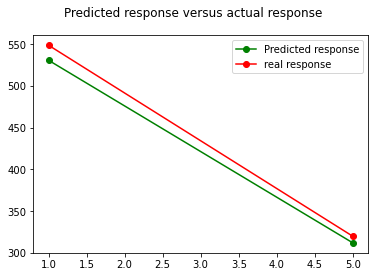

TEST RESPONSE VALUES:
     response
1     548.5
5     319.7
Predictions: 
 1    530.500000
5    311.833333
dtype: float64


In [25]:
Features_Subset_model_1 = X_test_model_1[selected_features_model_1]
wls_predictions= model_1.get_prediction(Features_Subset_model_1)
predictions_summary_frame = wls_predictions.summary_frame()
print(predictions_summary_frame)

predicted_response=predictions_summary_frame['mean']
actual_response = Target_test_model_1
fig = plt.figure()
fig.suptitle('Predicted response versus actual response ')
predicted, = plt.plot(X_test_model_1.index, predicted_response, 'go-', label='Predicted response')
actual, = plt.plot(X_test_model_1.index, actual_response, 'ro-', label='real response')
plt.legend(handles=[predicted, actual])
plt.show()
print("TEST RESPONSE VALUES:\n ",Target_test_model_1)
print('Predictions: \n',model_1.predict(Features_Subset_model_1))

In [28]:
print(model_1.fittedvalues)

print(model_1.predict())

print(model_1.cov_params())

0    530.500000
7    311.833333
2    530.500000
4    311.833333
3    530.500000
6    311.833333
dtype: float64
[530.5        311.83333333 530.5        311.83333333 530.5
 311.83333333]
              Male      Female
Male    338.552222    0.000000
Female    0.000000  338.552222


## MODEL 2 (Using Backword Subset Selection for Endpoint 2)

In [29]:
# Backward Elimination



X_Train_model_2 = data.iloc[8:16][['Male','Female','dose']]

Target_model_2=data.iloc[8:16][['response']]

Features_FOR_MODEL_2, X_test_model_2, Target_model_2, Target_test_model_2 = train_test_split(X_Train_model_2, Target_model_2, test_size=0.13, random_state=42)

cols = list(Features_FOR_MODEL_2.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Features_Subset_model_2 = Features_FOR_MODEL_2[cols]
    ##Features_Subset = sm.add_constant(Features_Subset)
    model_2 = sm.WLS(Target_model_2,Features_Subset_model_2).fit()
    p = pd.Series(model_2.pvalues.values[0:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print("Current Features : \n",cols)
    print("Adjusted R2 :", model_2.rsquared_adj)
    print("         R2 :", model_2.rsquared)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_model_2 = cols
print("Selected Features are: ", selected_features_model_2)

Current Features : 
 ['Male', 'Female', 'dose']
Adjusted R2 : 0.7388438706182437
         R2 : 0.8433063223709463
Selected Features are:  ['Male', 'Female', 'dose']


### Based on the p values comparison selection  we will have 'Male','Female' , 'dose'  as  coefficients and the adjusted R2 score is 0.73 in this case.

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1  530.500000  18.399789     479.413997     581.586003    428.327994   
5  311.833333  18.399789     260.747330     362.919336    209.661327   

   obs_ci_upper  
1    632.672006  
5    414.005340  


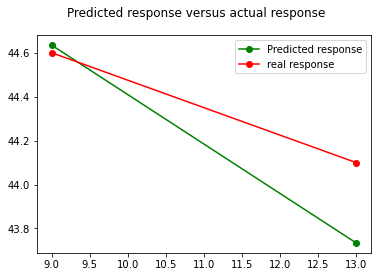

TEST RESPONSE VALUES:
      response
9       44.6
13      44.1
Predictions: 
 1    44.634286
5    43.734286
dtype: float64


In [30]:
Features_Subset_model_2 = X_test_model_1[selected_features_model_2]
wls_predictions_2= model_2.get_prediction(Features_Subset_model_2)
predictions_summary_frame_2= wls_predictions_2.summary_frame()
print(predictions_summary_frame)

predicted_response_2=predictions_summary_frame_2['mean']
actual_response_2 = Target_test_model_2
fig = plt.figure()
fig.suptitle('Predicted response versus actual response ')
predicted_2, = plt.plot(X_test_model_2.index, predicted_response_2, 'go-', label='Predicted response')
actual_2, = plt.plot(X_test_model_2.index, actual_response_2, 'ro-', label='real response')
plt.legend(handles=[predicted_2, actual_2])
plt.show()
print("TEST RESPONSE VALUES:\n ",Target_test_model_2)
print('Predictions: \n',model_2.predict(Features_Subset_model_2))

## MODEL 3 (Using Backword Subset Selection for Endpoint 3)

In [16]:
# Backward Elimination

X_Train_model_3 = data.iloc[16:24][['Male','Female','dose']]


Target_model_3=data.iloc[16:24][['response']]

Features_FOR_MODEL_3, X_test_model_3, Target_model_3, Target_test_model_3 = train_test_split(X_Train_model_3, Target_model_3, test_size=0.13, random_state=42)

cols = list(Features_FOR_MODEL_3.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Features_Subset_model_3 = Features_FOR_MODEL_3[cols]
    ##Features_Subset = sm.add_constant(Features_Subset)
    model_3 = sm.WLS(Target_model_3,Features_Subset_model_3).fit()
    p = pd.Series(model_3.pvalues.values[0:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print("Current Features : \n",cols)
    print("Adjusted R2 :", model_3.rsquared_adj)
    print("         R2 :", model_3.rsquared)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_model_3 = cols
print("Selected Features are: ", selected_features_model_3)

Current Features : 
 ['Male', 'Female', 'dose']
Adjusted R2 : 0.9531727828746178
         R2 : 0.9719036697247707
Selected Features are:  ['Male', 'Female', 'dose']


### Based on the p values comparison selection  we will have 'Male','Female' , 'dose'  as  coefficients and the adjusted R2 score is 0.95 in this case.

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1  530.500000  18.399789     479.413997     581.586003    428.327994   
5  311.833333  18.399789     260.747330     362.919336    209.661327   

   obs_ci_upper  
1    632.672006  
5    414.005340  


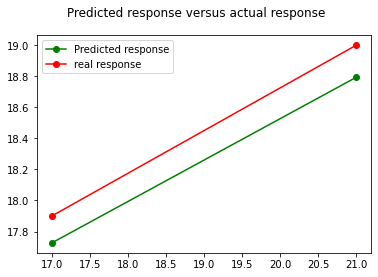

TEST RESPONSE VALUES:
      response
17      17.9
21      19.0
Predictions: 
 17    17.726667
21    18.793333
dtype: float64


In [31]:
Features_Subset_model_3 = X_test_model_3[selected_features_model_3]
wls_predictions_3= model_3.get_prediction(Features_Subset_model_3)
predictions_summary_frame_3= wls_predictions_3.summary_frame()
print(predictions_summary_frame)

predicted_response_3=predictions_summary_frame_3['mean']
actual_response_3 = Target_test_model_3
fig = plt.figure()
fig.suptitle('Predicted response versus actual response ')
predicted_3, = plt.plot(X_test_model_3.index, predicted_response_3, 'go-', label='Predicted response')
actual_3, = plt.plot(X_test_model_3.index, actual_response_3, 'ro-', label='real response')
plt.legend(handles=[predicted_2, actual_2])
plt.show()
print("TEST RESPONSE VALUES:\n ",Target_test_model_3)
print('Predictions: \n',model_3.predict(Features_Subset_model_3))

## Unique MODEL 4 (All the endpoints are included as coefficients in One Model)

In [32]:
X_Train_model_4 = data[['dose','Male','Female',1,2,3]]
# Backward Elimination
Target_model_4=data['response']

Features_FOR_MODEL_4, X_test_model_4, Target_model_4, Target_test_model_4 = train_test_split(X_Train_model_4, Target_model_4, test_size=0.13, random_state=42)

cols = list(Features_FOR_MODEL_4.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Features_Subset_model_4 = Features_FOR_MODEL_4[cols]
    ##Features_Subset = sm.add_constant(Features_Subset)
    model_4 = sm.WLS(Target_model_4,Features_Subset_model_4).fit()
    reg = LinearRegression().fit(Features_Subset_model_4, Target_model_4)
    p = pd.Series(model_4.pvalues.values[0:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print("Current Features : \n",cols)
    print("Adjusted R2 :", model_4.rsquared_adj)
    print("         R2 :", model_4.rsquared)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_model_4= cols
print("Selected Features are: ", selected_features_model_4)

Current Features : 
 ['dose', 'Male', 'Female', 1, 2, 3]
Adjusted R2 : 0.9100284763476553
         R2 : 0.9289698497481489
Current Features : 
 ['Male', 'Female', 1, 2, 3]
Adjusted R2 : 0.9147183400446104
         R2 : 0.9281838653007245
Selected Features are:  ['Male', 'Female', 1, 2, 3]


## MODEL 4 SCORES

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1  530.500000  18.399789     479.413997     581.586003    428.327994   
5  311.833333  18.399789     260.747330     362.919336    209.661327   

   obs_ci_upper  
1    632.672006  
5    414.005340  


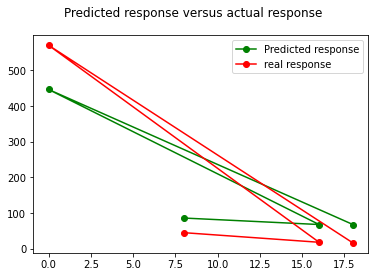

TEST RESPONSE VALUES:
  8      45.2
16     18.3
0     570.4
18     16.5
Name: response, dtype: float64
Predictions: 
 8      86.213143
16     68.032000
0     446.498857
18     68.032000
dtype: float64
regression_model.score:
 0.9002822933484461


In [33]:
Features_Subset_model_4 = X_test_model_4[selected_features_model_4]
wls_predictions_4= model_4.get_prediction(Features_Subset_model_4)
predictions_summary_frame_4= wls_predictions_4.summary_frame()
print(predictions_summary_frame)

predicted_response_4=predictions_summary_frame_4['mean']
actual_response_4 = Target_test_model_4
fig = plt.figure()
fig.suptitle('Predicted response versus actual response ')
predicted_4, = plt.plot(X_test_model_4.index, predicted_response_4, 'go-', label='Predicted response')
actual_4, = plt.plot(X_test_model_4.index, actual_response_4, 'ro-', label='real response')
plt.legend(handles=[predicted_4, actual_4])
plt.show()
print("TEST RESPONSE VALUES:\n ",Target_test_model_4)
print('Predictions: \n',model_4.predict(Features_Subset_model_4))
reg.predict(Features_Subset_model_4)
print('regression_model.score:\n',reg.score(Features_Subset_model_4, Target_test_model_4))


In [34]:
print(model_4.fittedvalues)

print(model_4.predict())

print(model_4.cov_params())

11     86.213143
9      86.213143
13     11.040143
1     446.498857
21     -7.141000
5     371.325857
2     446.498857
12     11.040143
15     11.040143
3     446.498857
4     371.325857
22     -7.141000
17     68.032000
20     -7.141000
23     -7.141000
7     371.325857
10     86.213143
14     11.040143
19     68.032000
6     371.325857
dtype: float64
[ 86.21314286  86.21314286  11.04014286 446.49885714  -7.141
 371.32585714 446.49885714  11.04014286  11.04014286 446.49885714
 371.32585714  -7.141       68.032       -7.141       -7.141
 371.32585714  86.21314286  11.04014286  68.032      371.32585714]
              Male      Female           1           2           3
Male    268.788756 -107.005950   36.942530   36.942530   87.897745
Female -107.005950  185.986533   30.573129   30.573129   17.834325
1        36.942530   30.573129  330.662945 -124.294327 -138.852959
2        36.942530   30.573129 -124.294327  330.662945 -138.852959
3        87.897745   17.834325 -138.852959 -138.852959 